# **Online Shoppers Purchasing Intention**

---

# **Stage 1 - Exploratory Data Analysis**

## Group 4 - `Quattro`
Authors and Contributors
- Andre Wijaya
- Aulia Rizkiyana
- Keven Jevry
- Lana Fuadi
- Siti Nurfadillah Salsabila
- Syahril Dimas Sabirin
- Yusuf Lukito Pramudana

# 1. Data Exploration
[Data Exploration](https://www.techtarget.com/searchbusinessanalytics/definition/data-exploration/) merupakan langkah pertama dalam analisis data yang melibatkan penggunaan *data visualization tools* dan *statistical techniques* untuk mengungkap karakteristik dan pola awal dari suatu *dataset*. [Ini](https://mode.com/blog/what-is-data-exploration/) tujuannya untuk memperoleh *preliminary analysis* yang memberikan pemahaman yang lebih dalam tentang data dan variabelnya.

## 1.0. Import Library

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import plotly.express as px
import plotly.graph_objs as go

# Machine learning
import sklearn

# Ignore warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
from matplotlib import rcParams

In [3]:
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', matplotlib.__version__)
print('Seaborn', sns.__version__)
print('SciPy', scipy.__version__)
print('Scikit-Learn', sklearn.__version__)

NumPy 1.22.4
Pandas 1.4.4
Matplotlib 3.7.1
Seaborn 0.12.2
SciPy 1.10.1
Scikit-Learn 1.2.2


## 1.1. Data Description

### 1.1.1. Read Dataset

Dataset [Online Shoppers Purchasing Intention](https://www.kaggle.com/datasets/imakash3011/online-shoppers-purchasing-intention-dataset/) merupakan dataset yang dibentuk secara khusus, sehingga setiap sesi akan dimiliki oleh pelanggan yang berbeda selama periode 1 tahun. Dataset ini terdiri dari 12.330 baris dan 18 kolom fitur, setiap baris berisi data yang berkaitan dengan sesi kunjungan (waktu yang dihabiskan) pelanggan pada situs e-commerce.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Read file into DataFrame: df1
file = '/content/drive/MyDrive/online_shoppers_intention.csv'
df1 = pd.read_csv(file)

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### 1.1.2. Quick View

In [7]:
# Return the first 5 rows
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
# Return the last 5 rows
df1.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


## 1.2. Data Understanding

### 1.2.1. Data Dimension

In [9]:
df1.shape

(12330, 18)

In [10]:
print('Dataset ini memiliki dimensi data, yaitu')
print('Jumlah baris: {}'.format(df1.shape[0]))
print('Jumlah kolom: {}'.format(df1.shape[1]))

Dataset ini memiliki dimensi data, yaitu
Jumlah baris: 12330
Jumlah kolom: 18


### 1.2.2. Data Types and Structure

In [11]:
# Information about df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Untuk mendapatkan ringkasan singkat tentang dataset, kami menggunakan fungsi `info()`. Hasil observasi yang didapatkan adalah sebagai berikut.
- Dari total 18 kolom, ada 4 kolom atau fitur dengan tipe data yang kurang sesuai, yaitu `OperatingSystems`, `Browser`, `Region`, dan `TrafficType`, seharusnya string bukan integer, karena kemungkinan sudah melalui proses _label encoding_, sedangkan tipe data pada kolom lainnya sudah sesuai.
- Tidak ada kolom yang memiliki nilai kosong atau _missing values_.
- Tipe data berupa boolean (2), float (7), integer (7), dan string (2).

### 1.2.3. Detect Missing Values

Untuk memastikan adanya _missing values_ dalam dataset, kita menggunakan metode `isna()`.

In [12]:
# Detect missing value
df1.isna().any()

Administrative             False
Administrative_Duration    False
Informational              False
Informational_Duration     False
ProductRelated             False
ProductRelated_Duration    False
BounceRates                False
ExitRates                  False
PageValues                 False
SpecialDay                 False
Month                      False
OperatingSystems           False
Browser                    False
Region                     False
TrafficType                False
VisitorType                False
Weekend                    False
Revenue                    False
dtype: bool

- Output **False** menyatakan bahwa kolom tersebut tidak memiliki *missing value* atau *null*.

In [13]:
# Summarize missing value
df1.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [14]:
# Total Number of NA
df1.isnull().sum().sum()

0

- Tidak ada kolom yang *null* (bernilai *None* ataupun *NaN*).

### 1.2.4. Detect Duplicates

Untuk menemukan adanya _duplicates_, kita menggunakan metode `duplicated()`.

In [15]:
duplicated_rows = df1.duplicated()
duplicated_rows.value_counts()

False    12205
True       125
dtype: int64

In [16]:
# df1[duplicated_rows]

- Ternyata ditemukan data duplikat sebanyak 125 baris. Walaupun demikian, kita berasumsi bahwa data tersebut merupakan data unik, yang terkait dengan sesi kunjungan pelanggan.

### 1.2.5. Unique Elements

Untuk mencari elemen unik dalam dataset, kita menggunakan fungsi `nunique()`.

In [17]:
# Count number of distinct elements
df1.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

- Fitur `Administrative_Duration`, `Informational_Duration`, dan `ProductRelated_Duration` memiliki elemen unik atau kategori yang cukup banyak, sehingga kita bisa melakukan _feature selection/dimensionality reduction_ atau kita bisa buat fitur baru `TotalPage_Duration` atau `AvgPage_Duration`.
- Fitur `Administrative`, `Informational`, dan `ProductRelated` juga bisa buat fitur baru `TotalPage` atau `AvgPage`.
- Fitur `BounceRates`, `ExitRates`, dan `PageValues` akan dipertahankan.


## 1.3. Descriptive Statistics

In [18]:
df1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [19]:
# Before converting
before = df1.dtypes

# Converting dtypes: integer to string
cols = ['OperatingSystems', 'Browser', 'Region', 'TrafficType']
for col in cols:
    df1[col] = df1[col].astype(str)

# Converting dtypes: boolean to string
df1['Revenue'] = df1['Revenue'].astype(int).astype(str)
df1['Weekend'] = df1['Weekend'].astype(int).astype(str)

# After converting
after = df1.dtypes

print(f'Sebelum Konversi:\n{before}\n')
print(f'Sesudah Konversi:\n{after}\n')

Sebelum Konversi:
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Sesudah Konversi:
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
Spec

In [20]:
num_var = df1.select_dtypes(exclude = ['object'])
cat_var = df1.select_dtypes(include = ['object'])

### 1.3.1. Numerical Features

In [21]:
num_var.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [22]:
num_var.describe().loc[['mean', '50%']].T

,mean,50%
Administrative,2.315166,1.000000
Administrative_Duration,80.818611,7.500000
Informational,0.503569,0.000000
Informational_Duration,34.472398,0.000000
ProductRelated,31.731468,18.000000
ProductRelated_Duration,1194.746220,598.936905
BounceRates,0.022191,0.003112
ExitRates,0.043073,0.025156
PageValues,5.889258,0.000000
SpecialDay,0.061427,0.000000


Dalam fitur numerikal:
- Ada perbedaan yang signifikan antara nilai mean dan median (P50), yaitu nilai mean > median, karena kemungkinan dipengaruhi oleh adanya _outlier_ atau pencilan, sehingga distribusi data akan cenderung menceng ke kanan atau _positively skewed_.
- Pada saat data pre-processing, kita akan melakukan _data transformation_ dan dilanjutkan dengan _feature scaling_.

### 1.3.2. Categorical Features

In [23]:
cat_var.describe()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330,12330,12330,12330,12330
unique,10,8,13,9,20,3,2,2
top,May,2,2,1,2,Returning_Visitor,0,0
freq,3364,6601,7961,4780,3913,10551,9462,10422


In [24]:
# Count values
for col in cat_var:
    print(f'Jumlah nilai pada kolom fitur {col}:')
    print(df1[col].value_counts())
    print()
# Parameter normalize = True bisa digunakan untuk menghitung nilai frekuensi relatif atau proporsi

Jumlah nilai pada kolom fitur Month:
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

Jumlah nilai pada kolom fitur OperatingSystems:
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

Jumlah nilai pada kolom fitur Browser:
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

Jumlah nilai pada kolom fitur Region:
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

Jumlah nilai pada kolom fitur TrafficType:
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: Traf

In [25]:
# Mengambil nilai count dan freq
count = cat_var.describe().loc['count']
top_freq = cat_var.describe().loc['freq']

# Menghitung persentase top_freq terhadap count
percentage = (top_freq / count) * 100
percentage = percentage.astype(float)

# Menggabungkan hasil top_freq dengan percentage
result = pd.concat([cat_var.describe().loc['top'], percentage], axis=1)
result.columns = ['Most common value', 'Percentage (%)']

print(result.round(2))

                  Most common value  Percentage (%)
Month                           May           27.28
OperatingSystems                  2           53.54
Browser                           2           64.57
Region                            1           38.77
TrafficType                       2           31.74
VisitorType       Returning_Visitor           85.57
Weekend                           0           76.74
Revenue                           0           84.53


Berikut ini nilai yang paling umum dalam fitur kategorikal, berturut-turut adalah:
- `Month` : May (27,3%),
- `OperatingSystems` : 2 (53,5%),
- `Browser` : 2 (64,6%),
- `Region` : 1 (38,8%),
- `TrafficType` : 2 (31,7%),
- `VisitorType` : Returning_Visitor (85,6%),
- `Weekend` : 0 atau False (76,7%), dan
- `Revenue` : 0 atau False (84,5%).

### 1.3.3. Target Feature

Fitur `Revenue` digunakan sebagai *target feature* atau label kelas.

In [26]:
target = df1['Revenue']

In [27]:
persen_target = target.value_counts(normalize = True)
persen_target

0    0.845255
1    0.154745
Name: Revenue, dtype: float64

In [28]:
percent_negative = persen_target[0] * 100
percent_positive = persen_target[1] * 100

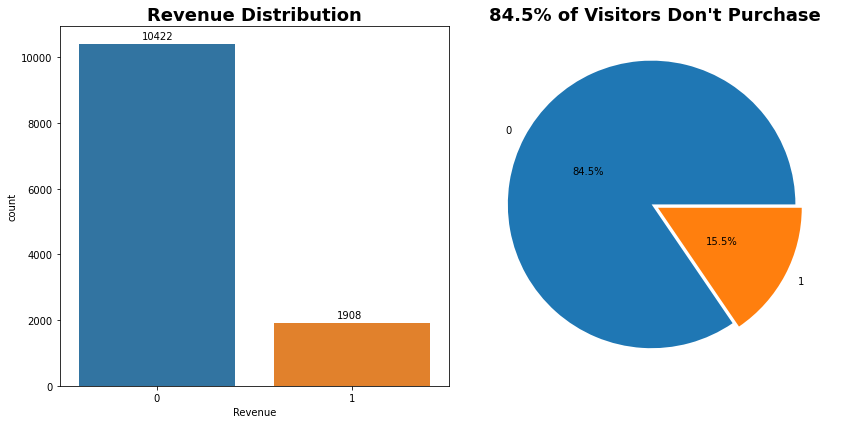

In [29]:
fig, axes = plt.subplots(nrows = 1,
                         ncols = 2,
                         figsize = (12, 6))

# Plot the first subplot
sns.countplot(x = 'Revenue',
              data = df1,
              ax = axes[0],
              palette = 'tab10')
# Menambahkan anotasi
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     va = 'center',
                     xytext = (-15, 7.5),
                     textcoords = 'offset points')
axes[0].set_title('Revenue Distribution', fontsize = 18, fontweight = 'bold')

# Plot the second subplot
x = (percent_negative, percent_positive)
axes[1].pie(x,
            explode = [0.025, 0.025],
            labels = df1['Revenue'].unique(),
            autopct = '%1.1f%%',
            pctdistance = 0.5,
            colors = sns.color_palette('tab10'))
axes[1].set_title('84.5% of Visitors Don\'t Purchase', fontsize = 18, fontweight = 'bold')

plt.tight_layout()
plt.show()

- Dari total 12.330 sesi, 84,5% atau 10.422 sesi merupakan **kelas negatif** yang tidak diakhiri dengan pembelian, sedangkan 15,5% sisanya atau 1.908 sesi merupakan **kelas positif** yang diakhiri dengan pembelian.
- Target _imbalance_ atau tidak seimbang, karena proporsi data minoritas (dalam hal ini kelas positif) relatif rendah, dengan _degree of imbalance_: [moderate](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data/).
- Pada saat data pre-processing, kita perlu melakukan _handling imbalance data_, seperti
  - Oversampling: menduplikasi data minoritas,
  - Undersampling: menghapus data mayoritas, atau
  - Class weight

# 2. Exploratory Data Analysis (EDA)

In [30]:
df_num = num_var.columns
df_cat = cat_var.columns

## 2.1. Univariate Analysis

### 2.1.1. Data Distribution

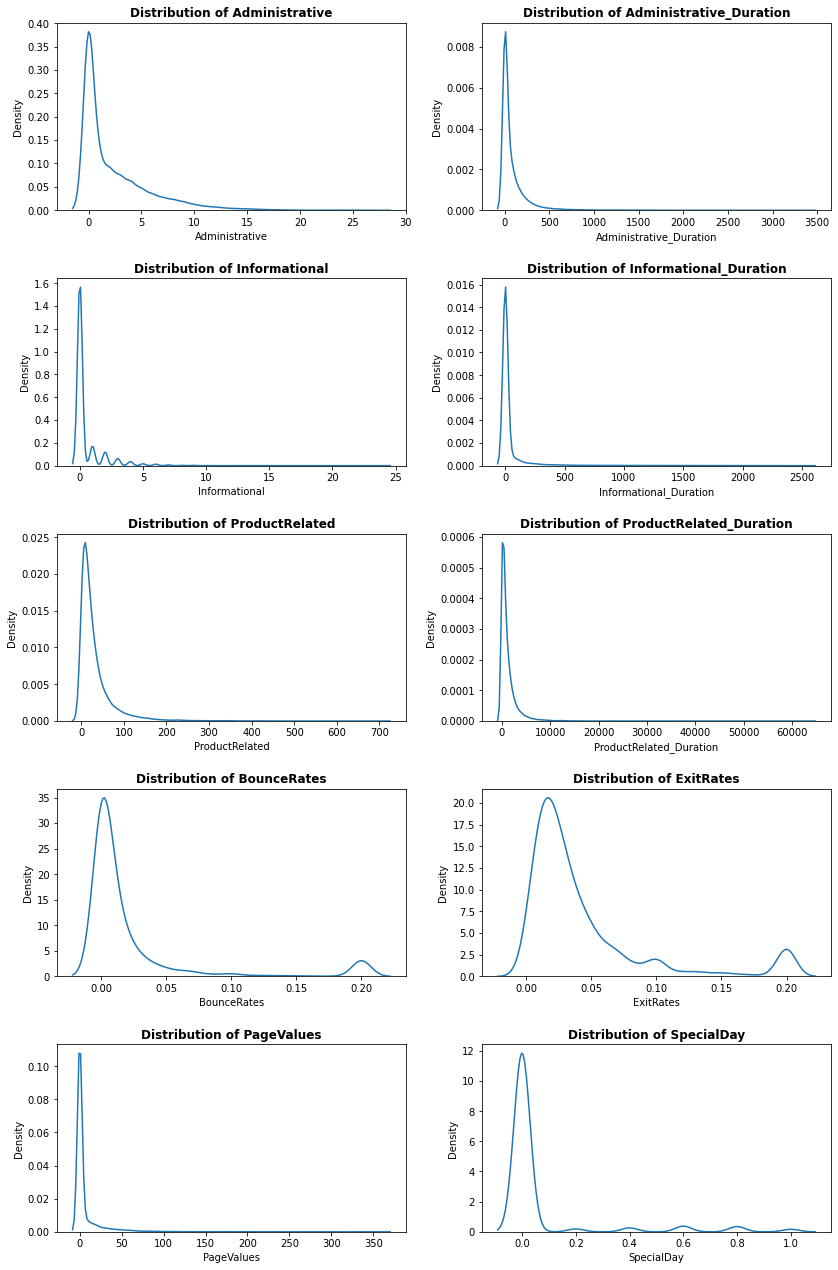

In [31]:
# Pengecekan distribusi dari fitur numerical dengan menggunakan kdeplot
rcParams['figure.figsize'] = 12, 18
for i in range(0, len(df_num)):
    plt.subplot(5, 2, i + 1)
    sns.kdeplot(x = df1[df_num[i]])
    plt.xlabel(df_num[i])
    plt.title('Distribution of ' + df_num[i],
              fontsize = 12,
              fontweight = 'bold')
    plt.tight_layout(pad = 2)

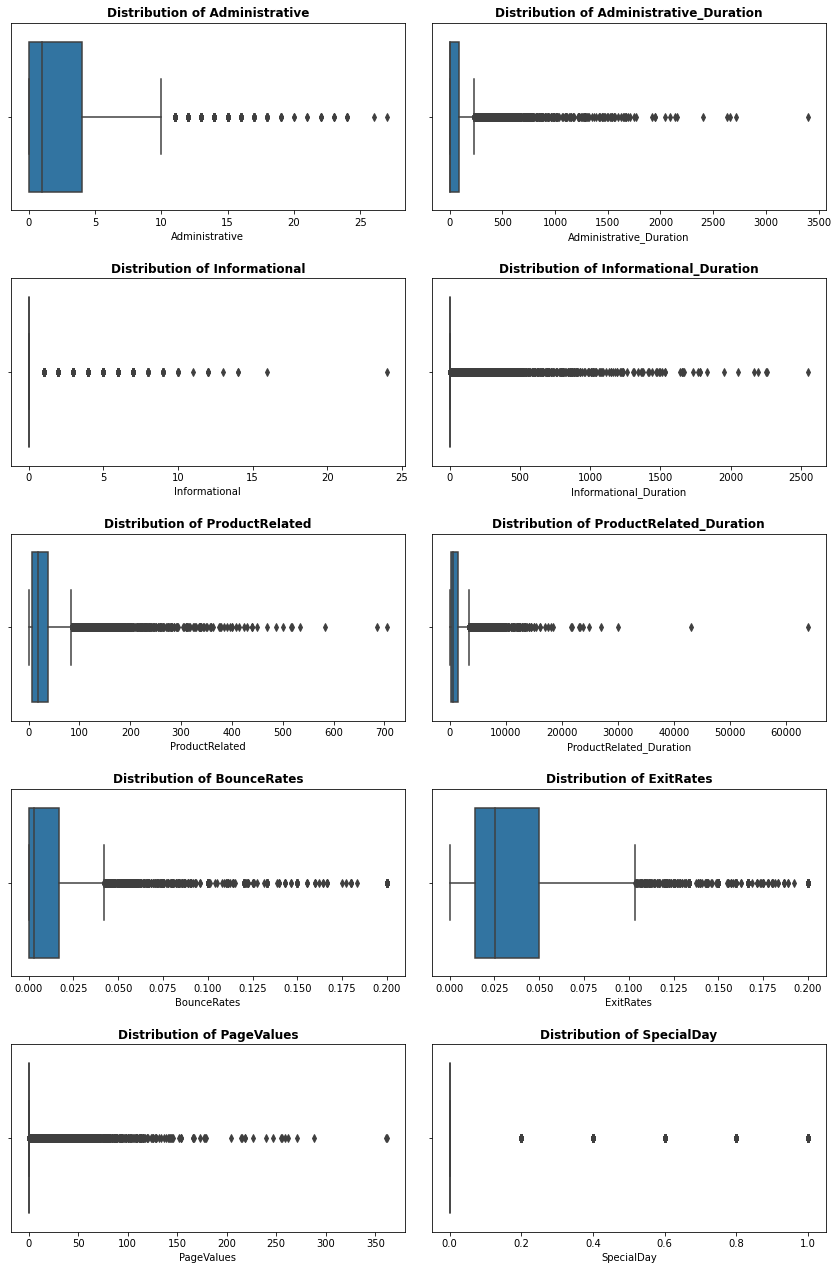

In [32]:
# Pengecekan distribusi dari fitur numerical menggunakan boxplot
for i in range(0, len(df_num)):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(x = df1[df_num[i]],
                orient = 'h')
    plt.title('Distribution of ' + df_num[i],
              fontsize = 12,
              fontweight = 'bold')
    plt.tight_layout(pad = 2)

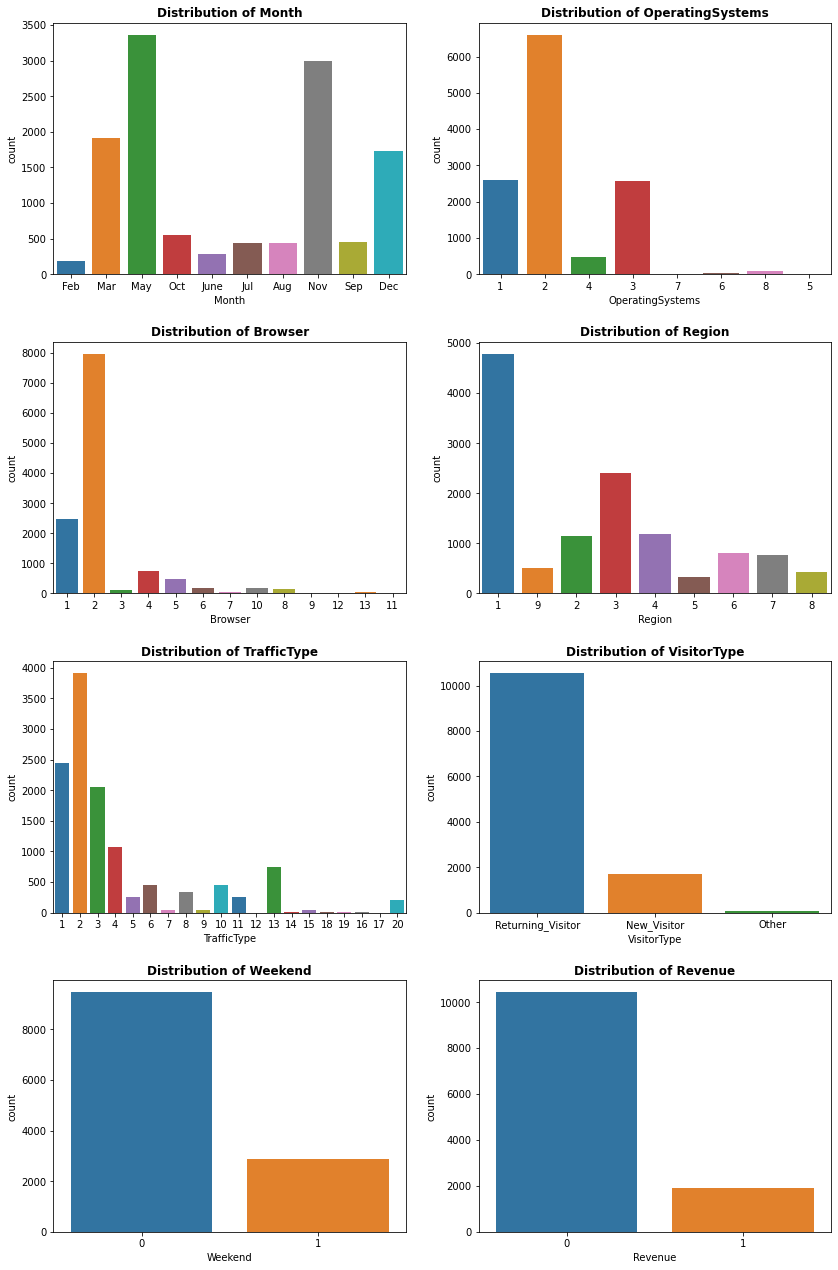

In [33]:
# Pengecekan distribusi dari fitur kategorical menggunakan countplot
rcParams['figure.figsize'] = 12, 18
for i in range(0, len(df_cat)):
    plt.subplot(4, 2, i + 1)
    sns.countplot(x = df1[df_cat[i]],
                  orient = 'h',
                  palette = 'tab10')
    plt.title('Distribution of ' + df_cat[i],
              fontsize = 12,
              fontweight = 'bold')
    plt.tight_layout(pad = 2)

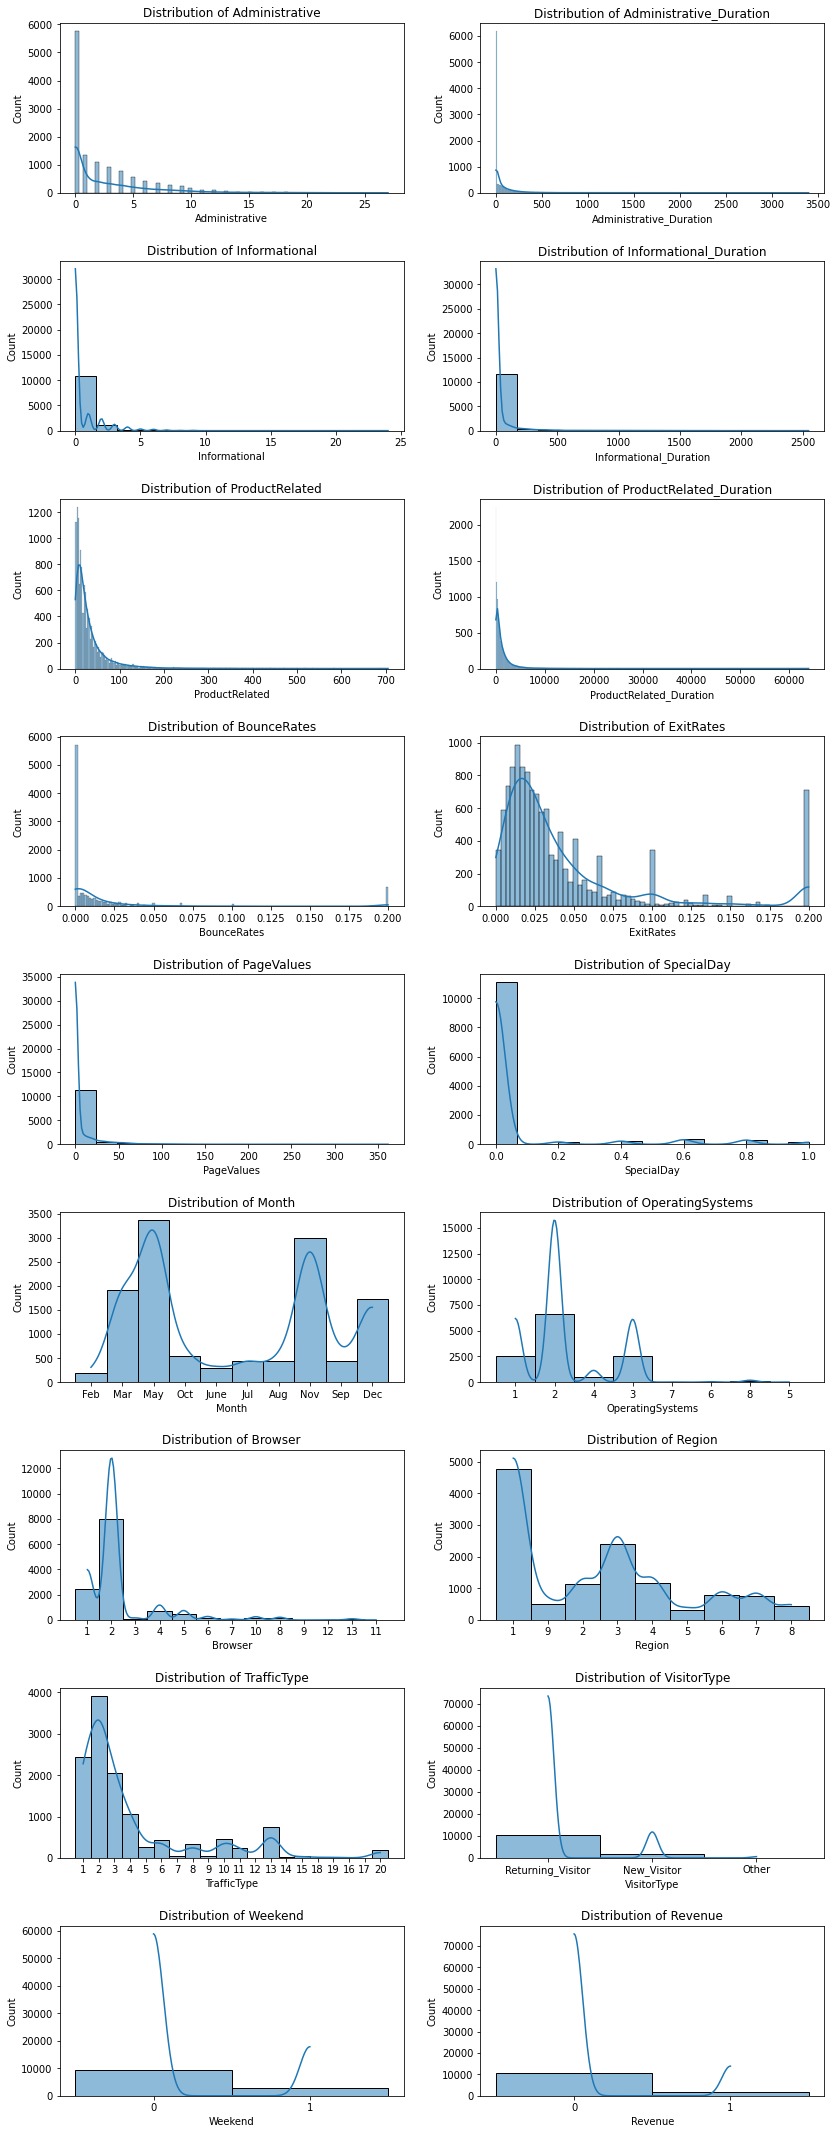

In [34]:
# Pengecekan distribusi masing-masing fitur dan target menggunakan histplot & kde
fig, axes = plt.subplots(nrows = 9,
                         ncols = 2,
                         figsize = (12, 30))
for i, column in enumerate(df1.columns):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.histplot(data = df1,
                 x = column,
                 ax = ax,
                 palette = 'tab10',
                 kde = True)
    ax.set_title(f'Distribution of {column}')
plt.tight_layout(pad = 2)

Dari distribusi data diatas dapat disimpulkan:
- Sebagian besar fitur memiliki distribusi yang _positively skewed_, karena nilai mean > median.
- Sebagian besar fitur memiliki _outlier_ atau pencilan.
- Fitur `OperatingSystem` distribusinya multimodal (nilai mode > 2).
- Fitur `Month` distribusinya mendekati bimodal dengan data tertinggi pada bulan Mei dan November.
- Fitur `VisitorType` dengan nilai Returning_Visitor sangat mendominasi.
- Fitur `Weekend` dengan nilai False mendominasi.
- Fitur `Revenue` dengan nilai False (tidak melakukan _purchasing_) sangat mendominasi.
- Fitur `Browser` dan `TrafficType` memiliki kategori yang cukup banyak (> 10 kategori).

Pada saat data pre-processing, kita perlu melakukan:
- Penghapusan _outlier_ pada setiap fitur bisa menggunakan IQR atau Z-Score.
- Melakukan _Data Transformation_ dengan _Log Transformation_, karena terdapat banyak fitur yang memiliki sebaran _right skew_.
- Melakukan _Feature Encoding_ untuk fitur `Month`, `Weekend`, dan `Revenue` menggunakan _Label Encoding_, sedangkan untuk fitur `VisitorType` menggunakan _One Hot Encoding_, karena terdapat nilai > 2 dan bukan tipe ordinal.
- Melakukan _Handling Imbalanced Data_ untuk fitur `Revenue`, karena fitur ini merupakan target yang mempunyai ketimpangan data yang signifikan.

## 2.2. Multivariate Analysis

### 2.2.1. Data Distribution

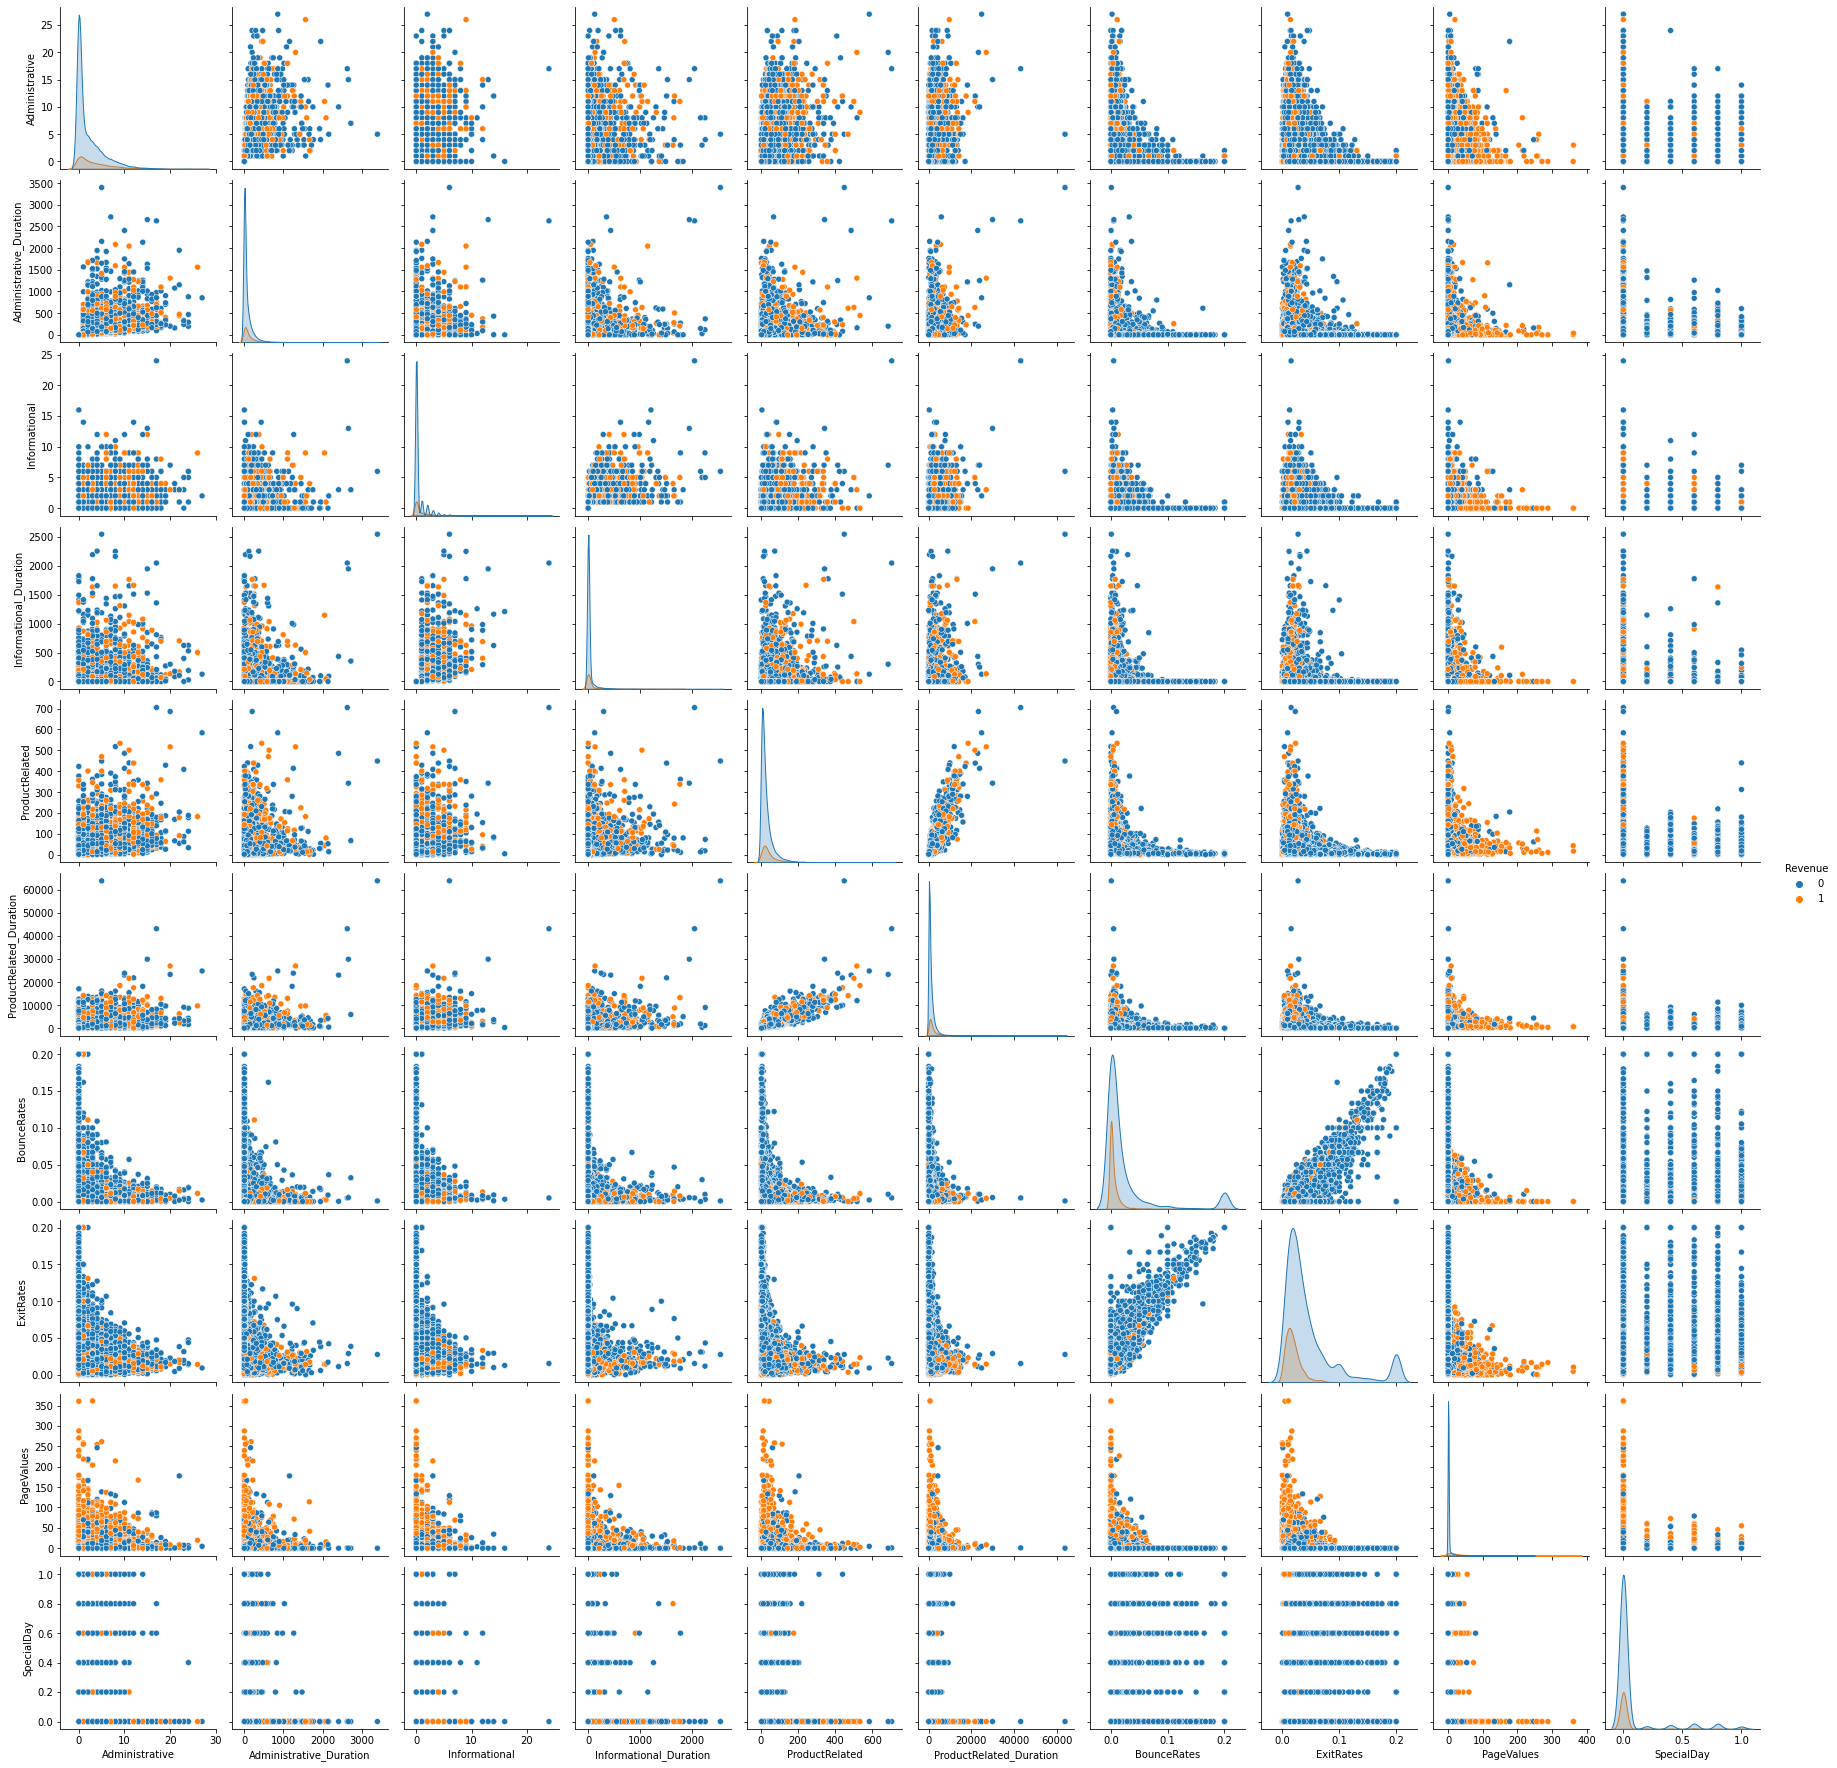

In [35]:
# Pengecekan distribusi setiap fitur terhadap target dengan pairplot
rcParams['figure.figsize'] = 18, 18
sns.pairplot(df1, diag_kind = 'kde', hue = 'Revenue')



* Pairplot digunakan untuk menganalisis antara dua variabel pada data (*bivariate analysis*). 
* Pada bagian scatterplot dapat dilihat sebaran data dari dua variabel yang dipilih.
* Parameter _hue_ bisa ditambahkan untuk mempertegas sebaran scatterplot setiap fitur.
* Berdasarkan pengamatan awal dari diagram pairplot di atas, hampir tidak ada scatterplot dengan warna yang terpisah dengan baik.
* Fitur dengan pemisahan warna yang kurang baik bisa berpengaruh pada tingkat akurasi model.
* Scatterplot dengan sebaran warna yang terpisah mengindikasikan bahwa dataset memiliki kombinasi fitur yang baik.
* Satu-satunya kolom yang cukup baik untuk dijadikan fitur adalah `PageValues` yang menunjukkan pemisahan warna secara jelas.


### 2.2.2. Data Correlation

<Figure size 720x360 with 0 Axes>

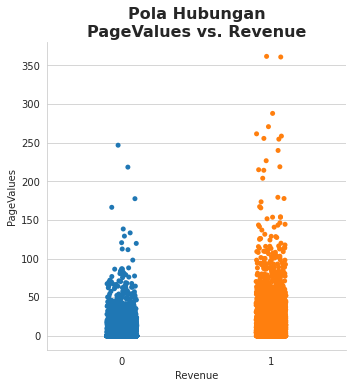

In [36]:
# Pengecekan korelasi antara fitur PageValues dengan target Revenue menggunakan stripplot
sns.set_style('whitegrid')
plt.figure(figsize = (10, 5))
sns.catplot(data = df1,
            x = 'Revenue',
            y = 'PageValues', 
            kind = 'strip',
            palette = 'tab10')
plt.title(label = 'Pola Hubungan\nPageValues vs. Revenue',
          fontsize = 16,
          fontweight = 'bold')
plt.show()

* Dari plot di atas bisa dilihat perbedaan sebaran warna yang cukup mencolok, hal ini menunjukkan bahwa `PageValues` dengan `Revenue` memiliki korelasi yang cukup baik.

<Figure size 720x360 with 0 Axes>

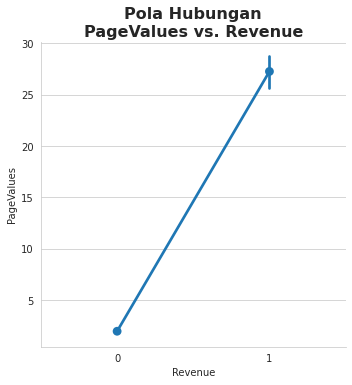

In [37]:
# Pengecekan korelasi antara fitur PageValues dengan target Revenue menggunakan point plot
sns.set_style('whitegrid')
plt.figure(figsize = (10, 5))
sns.catplot(data = df1,
            x = 'Revenue',
            y = 'PageValues',
            kind = 'point')
plt.title(label = 'Pola Hubungan\nPageValues vs. Revenue',
          fontsize = 16,
          fontweight = 'bold')
plt.show()

* Dengan menggunakan pointplot korelasi antara `PageValues` dengan `Revenue` terlihat dengan sangat jelas. 
* Tingginya nilai `PageValues` berbanding lurus dengan naiknya nilai `Revenue`.
* Fitur `PageValues` dan `Revenue` memiliki pola hubungan *positive linear association* yang membentuk pola garis lurus berdasarkan *Pearson Correlation.*


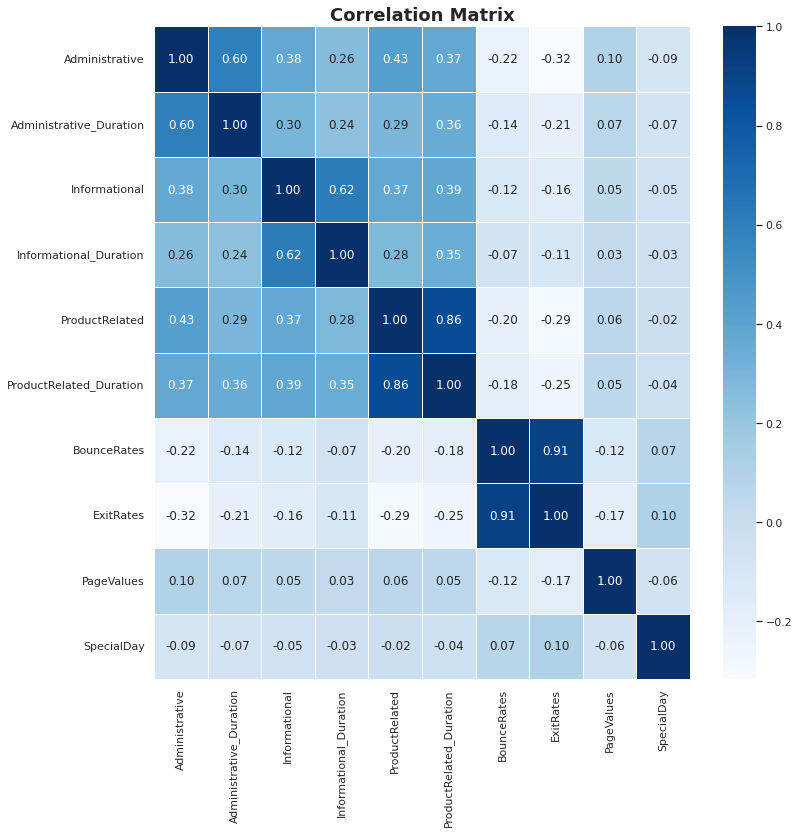

In [38]:
# Pengecekan korelasi antar fitur dengan Correlation Heatmap
sns.set(rc = {'figure.figsize': (12, 12)})
sns.heatmap(data = df1.corr(),
            cmap = 'Blues',
            annot = True,
            fmt = '.2f',
            linewidths = 0.5)
plt.title(label = 'Correlation Matrix',
          fontsize = 18,
          fontweight = 'bold')
plt.show()

- Banyak fitur tidak berkorelasi.
- Fitur `PageValues` dan `Revenue` cukup berkorelasi (0,49), karena ketika tidak ada pembelian yang dilakukan, jumlah sesi dengan _Page Values_ ​​= 0 relatif tinggi, yaitu sebanyak 9.230 sesi.
- Fitur `BounceRates` dan `ExitRates` berkorelasi tinggi (0,91), karena ketika _Bounce Rate_ meningkat, _Exit Rate_ juga meningkat berdasarkan hasil perhitungan oleh Google Analytics, sehingga kita memilih salah satu fitur, yaitu yang memiliki correlation lebih besar (ExitRates), atau bisa juga melakukan PCA.
- Korelasi antara durasi atau waktu yang dihabiskan pelanggan di halaman tertentu terhadap jumlahnya terlihat cukup jelas.

`PageValues` vs. `Revenue`

In [39]:
df_r = df1['Revenue'].astype(int)

In [40]:
# Pengecekan korelasi antara PageValues dengan Revenue menggunakan metode Pearson
correlation = df1['PageValues'].corr(df_r, method = 'pearson')
print(f'Korelasi antara PageValues dan Revenue adalah {correlation:.2f}')

Korelasi antara PageValues dan Revenue adalah 0.49


In [41]:
without_revenue = df1[(df_r == 0) & (df1['PageValues'] == 0)].shape[0]
with_revenue = df1[(df_r == 1) & (df1['PageValues'] == 0)].shape[0]
print('Jumlah sesi dengan Page Values ​​= 0')
print('Ketika tidak ada pembelian:', without_revenue)
print('Ketika ada pembelian:', with_revenue)

Jumlah sesi dengan Page Values ​​= 0
Ketika tidak ada pembelian: 9230
Ketika ada pembelian: 370


`BounceRates`, `ExitRates`, & `PageValues` vs. `Revenue`

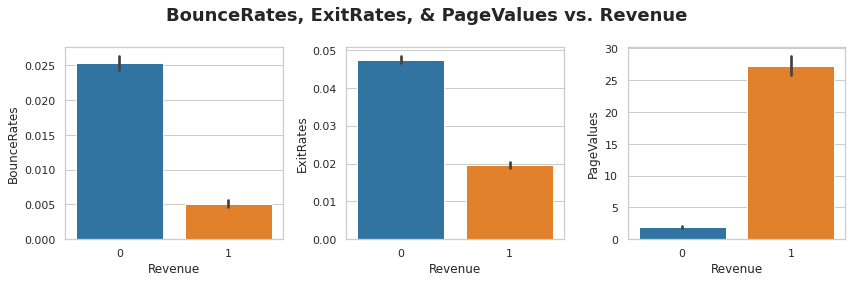

In [42]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(ncols = 3,
                         figsize = (12, 4))

sns.barplot(x = 'Revenue', y = 'BounceRates', palette = 'tab10', data = df1, ax = axes[0])
sns.barplot(x = 'Revenue', y = 'ExitRates', palette = 'tab10', data = df1, ax = axes[1])
sns.barplot(x = 'Revenue', y = 'PageValues', palette = 'tab10', data = df1, ax = axes[2])

fig.suptitle('BounceRates, ExitRates, & PageValues vs. Revenue', fontsize = 18, fontweight = 'bold')
plt.tight_layout()
plt.show()

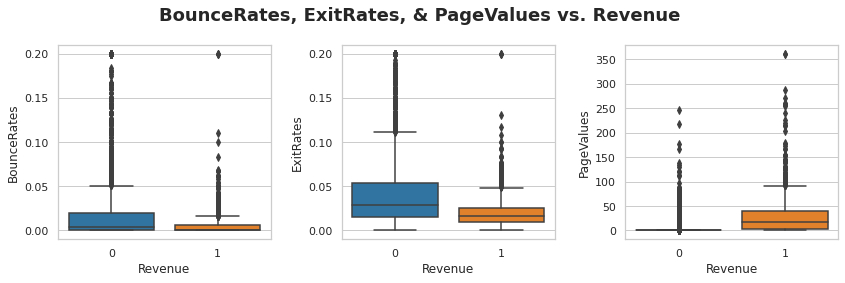

In [43]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(ncols = 3,
                         figsize = (12, 4))

sns.boxplot(x = 'Revenue', y = 'BounceRates', palette = 'tab10', data = df1, ax = axes[0])
sns.boxplot(x = 'Revenue', y = 'ExitRates', palette = 'tab10', data = df1, ax = axes[1])
sns.boxplot(x = 'Revenue', y = 'PageValues', palette = 'tab10', data = df1, ax = axes[2])

fig.suptitle('BounceRates, ExitRates, & PageValues vs. Revenue', fontsize = 18, fontweight = 'bold')
plt.tight_layout()
plt.show()

- Seperti yang ditunjukkan pada boxplot di atas, untuk menghasilkan `Revenue`, maka harus memiliki *Bounce Rates* yang rendah, *Exit Rates* yang rendah, dan *Page Values* yang tinggi.

# 3. Business Insights

- Di daerah `Region` 1 memiliki jumlah pengunjung situs web e-commerce yang terbanyak. Solusi untuk meningkatkan ketertarikan pengunjung, kita bisa melakukan promosi ke daerah-daerah yang jarang mengunjungi situs web dengan memberikan penawaran spesial, seperti gratis ongkos pengiriman (ongkir).

- Pengunjung yang berkunjung pada _weekend_ lebih sedikit dibandingkan dengan hari-hari biasa atau _weekday_, sehingga kita bisa mengadakan _event_ untuk menarik pelanggan melakukan transaksi pada waktu _weekend_.

- Bagi _Returning Visitor_ atau pelanggan yang sering berkunjung ke situs web dan melakukan transaksi, solusi yang dapat kita berikan yaitu memberikan kupon gratis belanja yang dapat digunakan pada transaksi berikutnya.

- Bagi _New Visitor_ atau pelanggan baru, agar melakukan transaksi pertama, solusi kita, bisa diberikan produk gratis dengan syarat melakukan pembelanjaan sejumlah tertentu.

- Pada fitur `Month`, diketahui bahwa bulan Maret, Mei, November, dan Desember merupakan bulan-bulan yang sering dikunjungi pengunjung, Solusi kita, coba untuk mengadakan suatu _event_ di setiap bulan seperti event (yang dilakukan kompetitor) 1.1 hingga 12.12.

- Pada bulan Februari jumlah pelanggan yang mengunjungi situs web sangat sedikit dan terlihat dari revenue yang dihasilkan juga sedikit. Solusi kita, diberikan promo di hari Valentine untuk menarik minat pelanggan melakukan transaksi.

# 4. Data Visualization

In [44]:
df2 = df1.copy()

Text(0, 0.5, 'Number of Visitors')

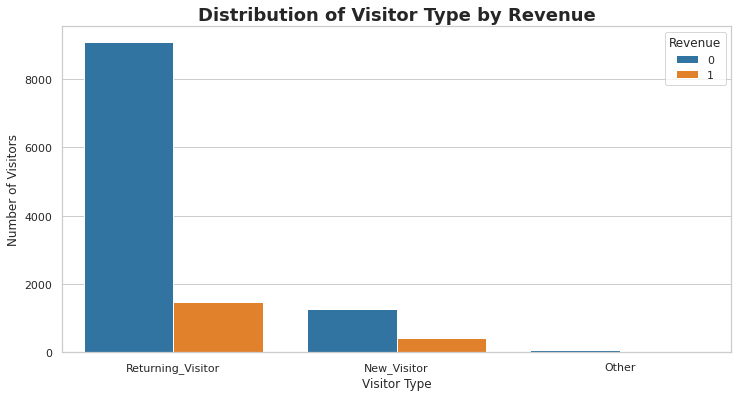

In [45]:
sns.set_style('whitegrid')
plt.figure(figsize = (12, 6))
sns.countplot(x ='VisitorType', hue = 'Revenue', palette = 'tab10', data = df2)
plt.title('Distribution of Visitor Type by Revenue', fontsize = 18, fontweight = 'bold')
plt.xlabel('Visitor Type')
plt.ylabel('Number of Visitors')

- Mayoritas pengunjung adalah _Returning Visitor_.
- Bagi _Returning Visitor_ atau pelanggan yang sering berkunjung ke situs web dan melakukan transaksi, solusi yang dapat kita berikan yaitu memberikan kupon gratis belanja yang dapat digunakan pada transaksi berikutnya.
- Bagi _New Visitor_ atau pelanggan baru, agar melakukan transaksi pertama, solusi kita, bisa diberikan produk gratis dengan syarat melakukan pembelanjaan sejumlah tertentu.

Text(0, 0.5, 'Frequency')

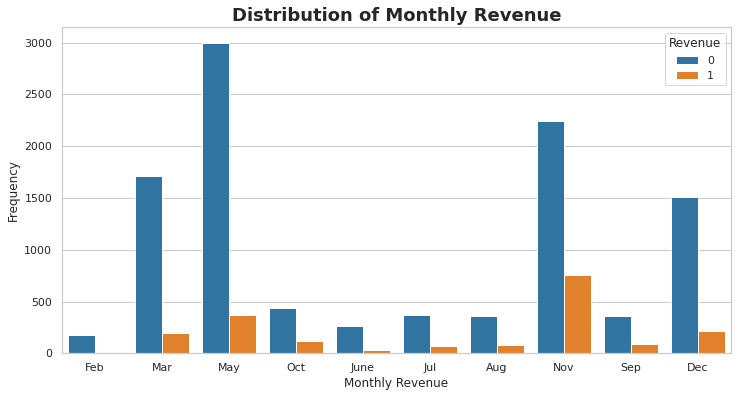

In [46]:
sns.set_style('whitegrid')
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Month', hue = 'Revenue', palette = 'tab10', data = df2)
plt.title('Distribution of Monthly Revenue', fontsize = 18, fontweight = 'bold')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')

- Data pada bulan Januari dan April tidak tersedia, kemungkinan terjadi kesalahan sistem, sehingga data sesi pada bulan-bulan tersebut tidak ada.
- Pada bulan Februari, jumlah penjualan relatif rendah, solusinya diberikan promo di hari Valentine untuk menarik minat pelanggan melakukan transaksi.

Text(0, 0.5, 'Number of Visitors')

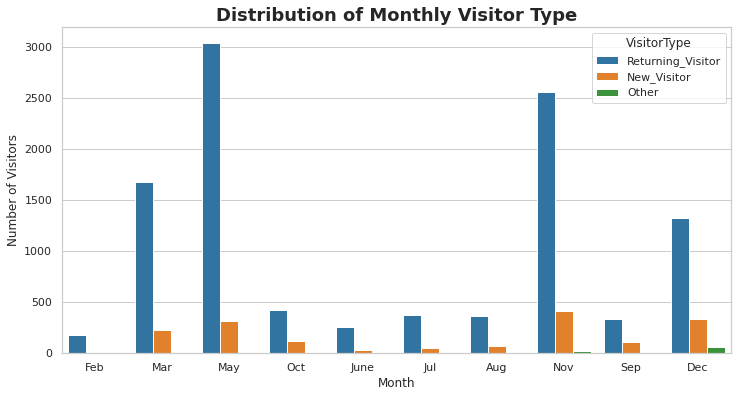

In [47]:
sns.set_style('whitegrid')
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Month', hue = 'VisitorType', palette = 'tab10', data = df2)
plt.title('Distribution of Monthly Visitor Type', fontsize = 18, fontweight = 'bold')
plt.xlabel('Month')
plt.ylabel('Number of Visitors')

Text(0, 0.5, 'Frequency')

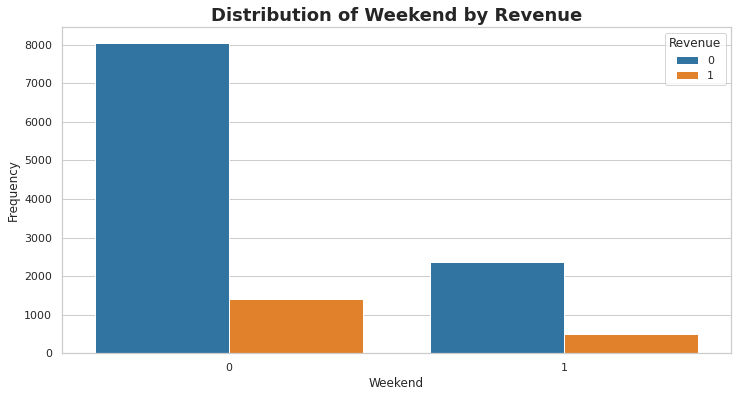

In [48]:
sns.set_style('whitegrid')
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Weekend', hue = 'Revenue', palette = 'tab10', data = df2)
plt.title('Distribution of Weekend by Revenue', fontsize = 18, fontweight = 'bold')
plt.xlabel('Weekend')
plt.ylabel('Frequency')

In [49]:
df2['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [50]:
df2['OperatingSystems'].unique()

array(['1', '2', '4', '3', '7', '6', '8', '5'], dtype=object)

In [51]:
a1 = [2, 1, 3, 4, 8, 6, 7, 5]
a2 = [6601, 2585, 2555, 478, 79, 19, 7, 6]

In [52]:
fig = go.Figure(data = [go.Pie(
    labels = a1,
    values = a2,
    title = {'text': 'Percentage of Different OS Used by Visitors',
             'font': {'size' : 18, 'family' : 'Arial', 'color' : 'black'}
    },
    textposition = 'inside',
    textinfo = 'percent+label',
    marker = dict(colors = sns.color_palette('tab10'))
)])
fig.show()


Text(0, 0.5, 'Frequency')

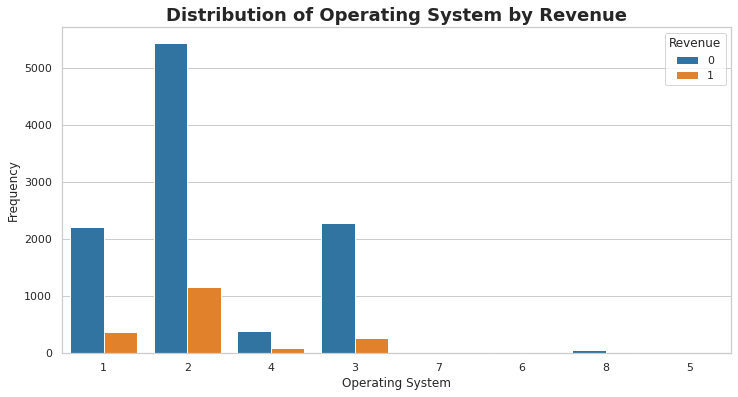

In [53]:
sns.set_style('whitegrid')
plt.figure(figsize = (12, 6))
sns.countplot(x = 'OperatingSystems', hue = 'Revenue', palette = 'tab10', data = df2)
plt.title('Distribution of Operating System by Revenue', fontsize = 18, fontweight = 'bold')
plt.xlabel('Operating System')
plt.ylabel('Frequency')

In [54]:
df2['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

Text(0, 0.5, 'Frequency')

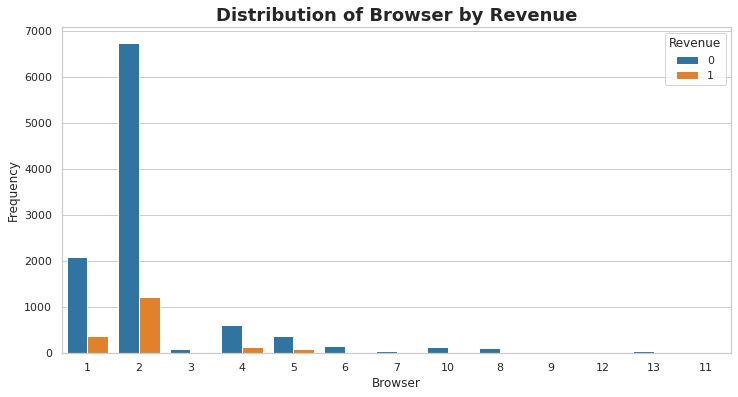

In [55]:
sns.set_style('whitegrid')
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Browser', hue = 'Revenue', palette = 'tab10', data = df2)
plt.title('Distribution of Browser by Revenue', fontsize = 18, fontweight = 'bold')
plt.xlabel('Browser')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

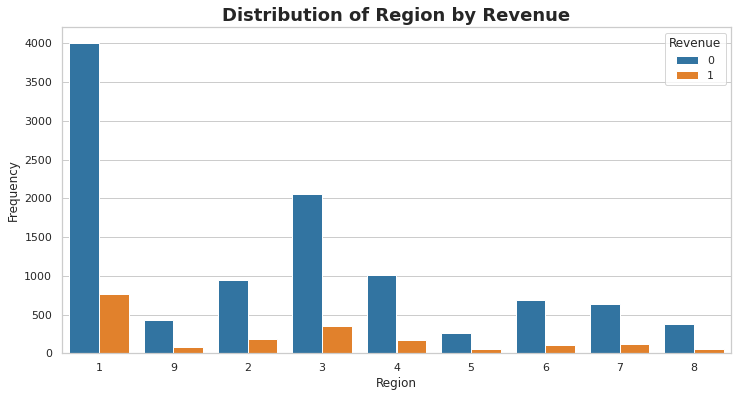

In [56]:
sns.set_style('whitegrid')
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Region', hue = 'Revenue', palette = 'tab10', data = df2)
plt.title('Distribution of Region by Revenue', fontsize = 18, fontweight = 'bold')
plt.xlabel('Region')
plt.ylabel('Frequency')

# 5. Data Storytelling

Dataset _Online Shoppers Purchasing Intention_ berisi informasi tentang perilaku dan minat pembeli saat browsing situs web e-commerce. Dataset ini mencakup 18 kolom atau fitur, numerikal (10 fitur) dan kategorikal (8 fitur), termasuk jenis pengunjung, durasi sesi, dan jumlah halaman yang dilihat.

Setelah menganalisis dataset, kami menemukan bahwa sebagian besar pengunjung merupakan returning visitor, dan hanya sedikit yang merupakan tipe pengunjung baru atau lainnya. Selain itu, pengunjung umumnya menjelajahi situs web di bulan Mei, November, dan Maret. Namun, data pada bulan Januari dan April tidak tersedia, kemungkinan terjadi kesalahan sistem, sehingga data sesi kunjungan pelanggan pada bulan-bulan tersebut tidak tercatat.

Ketika menganalisis perilaku pengunjung, kami menemukan bahwa sebagian besar pengunjung hanya melihat beberapa halaman dan menghabiskan waktu relatif sedikit di situs web. Selain itu, kami menemukan bahwa bounce rate, yang mengukur persentase pengunjung yang meninggalkan situs web setelah hanya melihat satu halaman, relatif tinggi. Ada kemungkinan halaman web memiliki desain UI (user interface) dan UX (user experience) kurang menarik.

Di sisi lain, kami menemukan bahwa pengunjung yang melihat lebih banyak halaman, menghabiskan lebih banyak waktu di situs web, dan memiliki nilai page values yang lebih tinggi, lebih cenderung melakukan pembelian. Selain itu, kami menemukan bahwa pengunjung yang browsing pada akhir pekan lebih cenderung melakukan pembelian daripada mereka yang browsing pada hari biasa atau _weekday_.

Dengan menganalisis korelasi antara variabel, kami menemukan bahwa jumlah halaman yang dilihat dan durasi sesi sangat berkorelasi, mengindikasikan bahwa pengunjung yang melihat lebih banyak halaman cenderung menghabiskan lebih banyak waktu di situs web. Selain itu, kami menemukan korelasi negatif antara bounce rate dan page value, mengindikasikan bahwa pengunjung yang menemukan konten yang lebih berharga di situs web lebih sedikit kemungkinannya untuk pergi setelah melihat satu halaman.

Secara keseluruhan, hal ini menunjukkan bahwa meningkatkan fitur dan pengalaman pengguna dari situs web dapat mengarah pada peningkatan pendapatan dengan mengurangi bounce rate dan mendorong pengunjung untuk menjelajahi lebih banyak halaman dan menghabiskan lebih banyak waktu di situs web. Selain itu, menargetkan pengunjung pada _weekday_ dan memberikan fitur yang relevan dan berharga juga dapat meningkatkan kemungkinan melakukan pembelian.